#Exploring the Data#

All  exploratory analysis (null values already dropped/replaced)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy import stats

%matplotlib inline

data = pd.read_csv('991_CleanedData.csv', low_memory=False)

In [2]:
data['RACE'] = data.ETHNIC.map({1:'Black', 8:'Asian', 9:'Asian', 10:'Caucasian', 13:'Hispanic'})

##Checking the Distribution and Information for Individual Variables##

Variables to explore:
- Discrimination score
- Race reason
- Age
- Perceived Stress score
- Income
- Degree
- BMI
- Baseline lipid vascular age
- C-reactive protein level
- Previous CVD

###Discrimination###

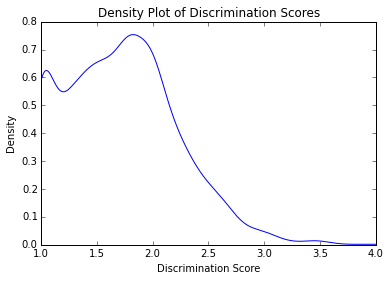

In [3]:
data.DISC_SCORE0.plot(kind='density', xlim=(1,4), title='Density Plot of Discrimination Scores')
plt.xlabel('Discrimination Score')
plt.ylabel('Density')

In [4]:
disc_data = data[pd.notnull(data['DISC_SCORE0'])]
print stats.normaltest(disc_data.DISC_SCORE0)

NormaltestResult(statistic=143.61608035994007, pvalue=6.5187510173975879e-32)


In [5]:
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab

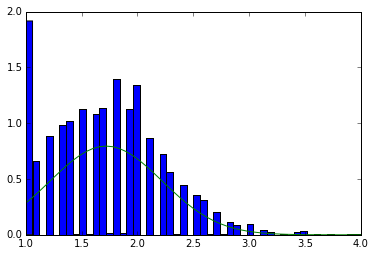

In [6]:
n, bins, patches = plt.hist(disc_data.DISC_SCORE0, 50, normed=1)
mu = np.mean(disc_data.DISC_SCORE0)
sigma = np.std(disc_data.DISC_SCORE0)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [7]:
stats.kstest(data.DISC_SCORE0, 'norm')

KstestResult(statistic=0.84134474606854293, pvalue=0.0)

Unfortunately not normally distributed.

In [8]:
data.DISC_SCORE0.describe()

count    3262.000000
mean        1.719401
std         0.501915
min         1.000000
25%         1.300000
50%         1.700000
75%         2.000000
max         4.000000
Name: DISC_SCORE0, dtype: float64

In [9]:
data.DISC_CAT0.value_counts(dropna=False)

HIGH    1646
LOW     1616
Name: DISC_CAT0, dtype: int64

A participant is said to have experienced high perceived discrimination if she answered "Often" or "Sometimes" to any of the 10 items on the discrimination scale. About half (50%) of participants noted they experienced "High" discrimination.

###Reason for Discrimination###

Participants who were classified as having High perceived discrimination were asked to choose what she believed to be the main reason for this discrimination.

- 1 = Race
- 2 = Ethnicity
- 3 = Gender
- 4 = Age
- 5 = Income Level
- 6 = Language
- 7 = Physical Appearance
- 8 = Sexual Orientation
- 9 = Other reason

In [10]:
data.MAINREA0.value_counts(sort=False, dropna=False)

NaN    1764
 1      422
 2       47
 3      199
 4       76
 5       89
 6       61
 7      183
 8       23
 9      398
Name: MAINREA0, dtype: int64

Of the 1,498 participants who recorded a reason for discrimination, 469 (31.3%) attributed their discrimination to their racial or ethnic identity (Race was the most frequent reason, followed by 'Other' and then Gender).

In [11]:
data[(data.MAINREA0 == 1) | (data.MAINREA0 == 2)].RACE.value_counts(dropna=False)

Black        319
Asian         80
Caucasian     39
Hispanic      31
Name: RACE, dtype: int64

###Age###

In [12]:
data.AGE0.describe()

count    3262.000000
mean       45.851931
std         2.692083
min        42.000000
25%        44.000000
50%        46.000000
75%        48.000000
max        53.000000
Name: AGE0, dtype: float64

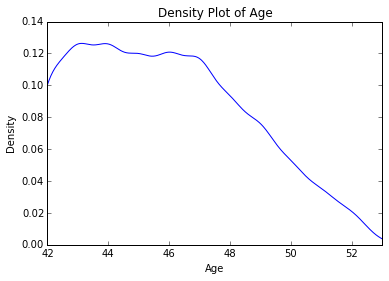

In [13]:
data.AGE0.plot(kind='density', xlim=(42, 53), title='Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

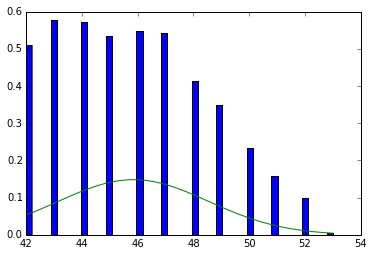

In [14]:
age_data = data[pd.notnull(data['AGE0'])]

n, bins, patches = plt.hist(age_data.AGE0, 50, normed=1)
mu = np.mean(age_data.AGE0)
sigma = np.std(age_data.AGE0)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

###Perceived Stress Score###

Note: minimum perceived stress score is 4, maximum possible is 20.

In [15]:
data.MOD_PSTRESS.describe()

count    3262.000000
mean        8.582771
std         2.929256
min         4.000000
25%         6.000000
50%         8.000000
75%        11.000000
max        19.000000
Name: MOD_PSTRESS, dtype: float64

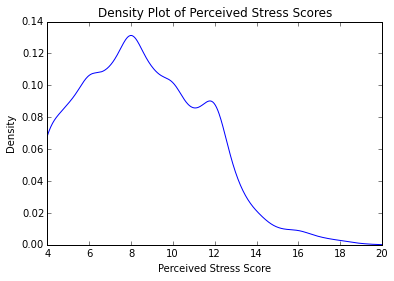

In [16]:
data.MOD_PSTRESS.plot(kind='density', xlim=(4,20), title='Density Plot of Perceived Stress Scores')
plt.xlabel('Perceived Stress Score')
plt.ylabel('Density')

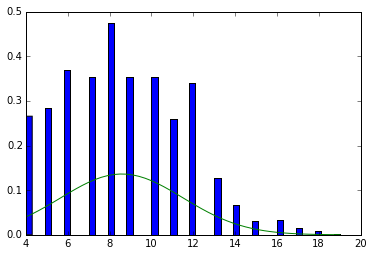

In [17]:
norm_data = data[pd.notnull(data['MOD_PSTRESS'])]

n, bins, patches = plt.hist(norm_data.MOD_PSTRESS, 50, normed=1)
mu = np.mean(norm_data.MOD_PSTRESS)
sigma = np.std(norm_data.MOD_PSTRESS)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [18]:
stats.kstest(data.MOD_PSTRESS, 'norm')

KstestResult(statistic=0.99996832875816688, pvalue=0.0)

###Income###

The key for income scores is:

- 1 = Less than 19,999
- 2 = 20-49,999
- 3 = 50-99,999
- 4 = 100,000 or more

In [19]:
data.INCOME0.value_counts(sort=False, dropna=False)

1     483
2    1077
3    1240
4     462
Name: INCOME0, dtype: int64

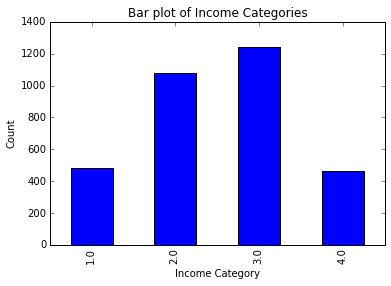

In [20]:
data.INCOME0.value_counts(sort=False).plot(kind='bar', title='Bar plot of Income Categories')
plt.xlabel('Income Category')
plt.ylabel('Count')

###Education###

Key for "DEGREE" is:

- 1 = Less than High School
- 2 = High School Graduate
- 3 = Some College/Technical School
- 4 = College Graduate
- 5 = Post Graduate Education

In [21]:
data.DEGREE.value_counts(sort=False, dropna=False)

1     235
2     572
3    1069
4     651
5     735
Name: DEGREE, dtype: int64

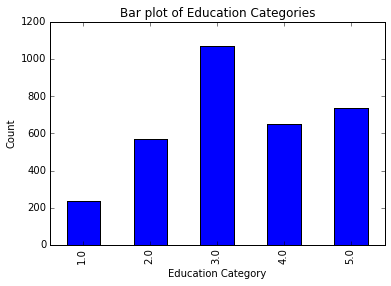

In [22]:
data.DEGREE.value_counts(sort=False).plot(kind='bar', title='Bar plot of Education Categories')
plt.xlabel('Education Category')
plt.ylabel('Count')

It seems like education is skewed slightly to the right.

###Body Mass Index###

Measured in kg/m^2

Categories for BMI follow WHO classification guidelines.

- Less than 18.5: Underweight
- Greater than 18.5, less than 25: Normal
- Greater than 25, less than 30: Overweight
- Greater than 30: Obese

In [23]:
data.BMI0.describe()

count    3262.000000
mean       28.254157
std         7.170365
min        14.989652
25%        22.921744
50%        26.745730
75%        32.042421
max        64.838400
Name: BMI0, dtype: float64

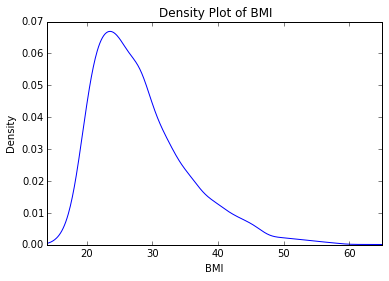

In [24]:
data.BMI0.plot(kind='density', xlim=(14,65), title='Density Plot of BMI')
plt.xlabel('BMI')
plt.ylabel('Density')

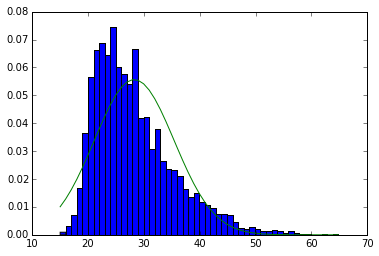

In [25]:
BMI_data = data[pd.notnull(data['BMI0'])]

n, bins, patches = plt.hist(BMI_data.BMI0, 50, normed=1)
mu = np.mean(BMI_data.BMI0)
sigma = np.std(BMI_data.BMI0)
plt.plot(bins, mlab.normpdf(bins, mu, sigma))

In [26]:
data.BMI_CAT.value_counts(sort=False, dropna=False)

0_Underweight        37
2_Overweight        911
1_HealthyWeight    1256
3_Obese            1058
Name: BMI_CAT, dtype: int64

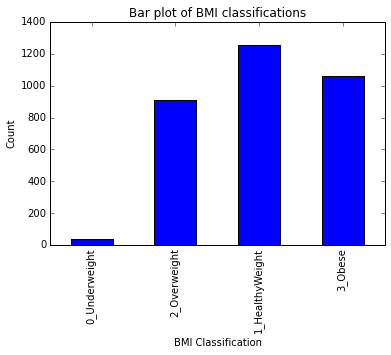

In [27]:
data.BMI_CAT.value_counts(sort=False).plot(kind='bar', title='Bar plot of BMI classifications')
plt.xlabel('BMI Classification')
plt.ylabel('Count')

Not really sure why it won't sort correctly...

###Lipid Vascular Age###

In [28]:
data.LV_AGE0.describe()

count    3262.000000
mean       46.018087
std        14.882283
min        21.000000
25%        36.000000
50%        43.000000
75%        52.000000
max       168.000000
Name: LV_AGE0, dtype: float64

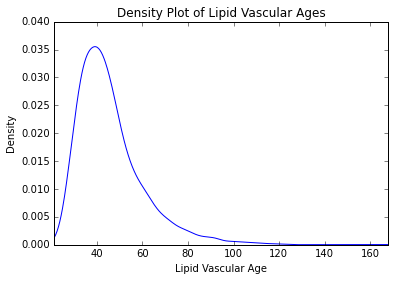

In [29]:
data.LV_AGE0.plot(kind='density', xlim=(21,168), title='Density Plot of Lipid Vascular Ages')
plt.xlabel('Lipid Vascular Age')
plt.ylabel('Density')

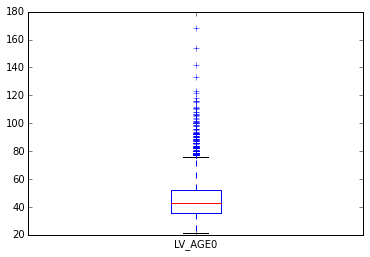

In [30]:
data.LV_AGE0.plot(kind='box')

In [31]:
data.LV_AGE_DIFF0.describe()

count    3262.000000
mean        0.166156
std        14.353084
min       -22.000000
25%        -9.000000
50%        -3.000000
75%         6.000000
max       117.000000
Name: LV_AGE_DIFF0, dtype: float64

The fact that there is a 117 year difference between vascular age and actual age for one participant is interesting/scary.

For fun: that participant is 51 years old, has an average systolic blood pressure of 195, cholesterol level is 328, hdl level is 58, takes blood pressure medication, and is not a smoker.

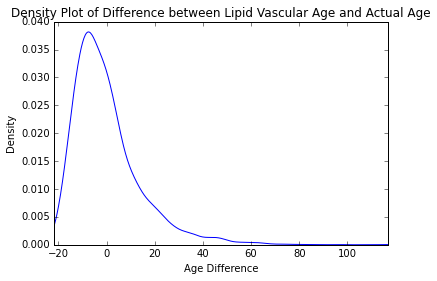

In [32]:
data.LV_AGE_DIFF0.plot(kind='density', xlim=(-22,117), title='Density Plot of Difference between Lipid Vascular Age and Actual Age')
plt.xlabel('Age Difference')
plt.ylabel('Density')

In [33]:
data.LV_AGE_PCT0.describe()

count    3262.000000
mean        0.001720
std         0.311080
min        -0.500000
25%        -0.208333
50%        -0.066667
75%         0.119048
max         2.347826
Name: LV_AGE_PCT0, dtype: float64

In [34]:
data['LV_AGE_ABSPCT0'] = data.LV_AGE_PCT0.abs()

In [35]:
data.LV_AGE_ABSPCT0.describe()

count    3262.000000
mean        0.225836
std         0.213907
min         0.000000
25%         0.087440
50%         0.186047
75%         0.297872
max         2.347826
Name: LV_AGE_ABSPCT0, dtype: float64

###C-Reactive Protein Levels###

In [36]:
data.CRPRESU0.describe()

count    3262.000000
mean        3.890664
std         6.226116
min         0.043000
25%         0.600000
50%         1.600000
75%         4.600000
max       105.600000
Name: CRPRESU0, dtype: float64

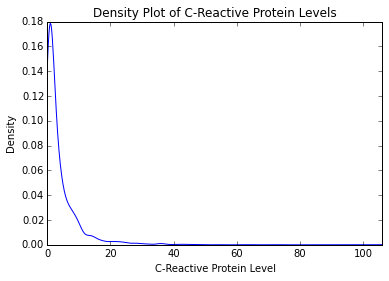

In [37]:
data.CRPRESU0.plot(kind='density', xlim=(0,106), title='Density Plot of C-Reactive Protein Levels')
plt.xlabel('C-Reactive Protein Level')
plt.ylabel('Density')